In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import networkx as nx
from matplotlib import cm


In [2]:
#function to wrap text in labels
def wrap_label(label, max_len=10):
    return '\n'.join(textwrap.wrap(label, width=max_len))

In [3]:

#load csv
fil_ride_df = pd.read_csv('fil_ride_df.csv')


C:\Users\varsh\AppData\Local\Temp\ipykernel_14224\3640905911.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  fil_ride_df = pd.read_csv('fil_ride_df.csv')


In [4]:
#build edge list by start and end neighborhoods, count trips
edge_df = fil_ride_df.groupby(['neighborhood', 'end_neighborhood']).size().reset_index(name='trip_count')

#filtering to only frequent trips (cleans up plot)
filtered_edges = edge_df[edge_df['trip_count'] >= 50]  # tune this threshold

#creating edge list
edges = [(row['neighborhood'], row['end_neighborhood'], row['trip_count']) for idx, row in filtered_edges.iterrows()]

#plot graph
G = nx.Graph()
G.add_weighted_edges_from(edges)

#metrics
#node size will be based on number of trips
node_strength = dict(G.degree(weight='weight'))
node_size = [node_strength.get(node, 1) * .25 for node in G.nodes()]

#color will be degree centrality
degree_centrality = nx.degree_centrality(G)
node_colors = [degree_centrality[node] for node in G.nodes()]
cmap = cm.get_cmap('coolwarm')

#created neighborhood labels
top_labels = {node: node for node in G.nodes()}

#graphing circular
pos = nx.circular_layout(G)
#weighting edges based on trup count
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]




C:\Users\varsh\AppData\Local\Temp\ipykernel_14224\4145955688.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')


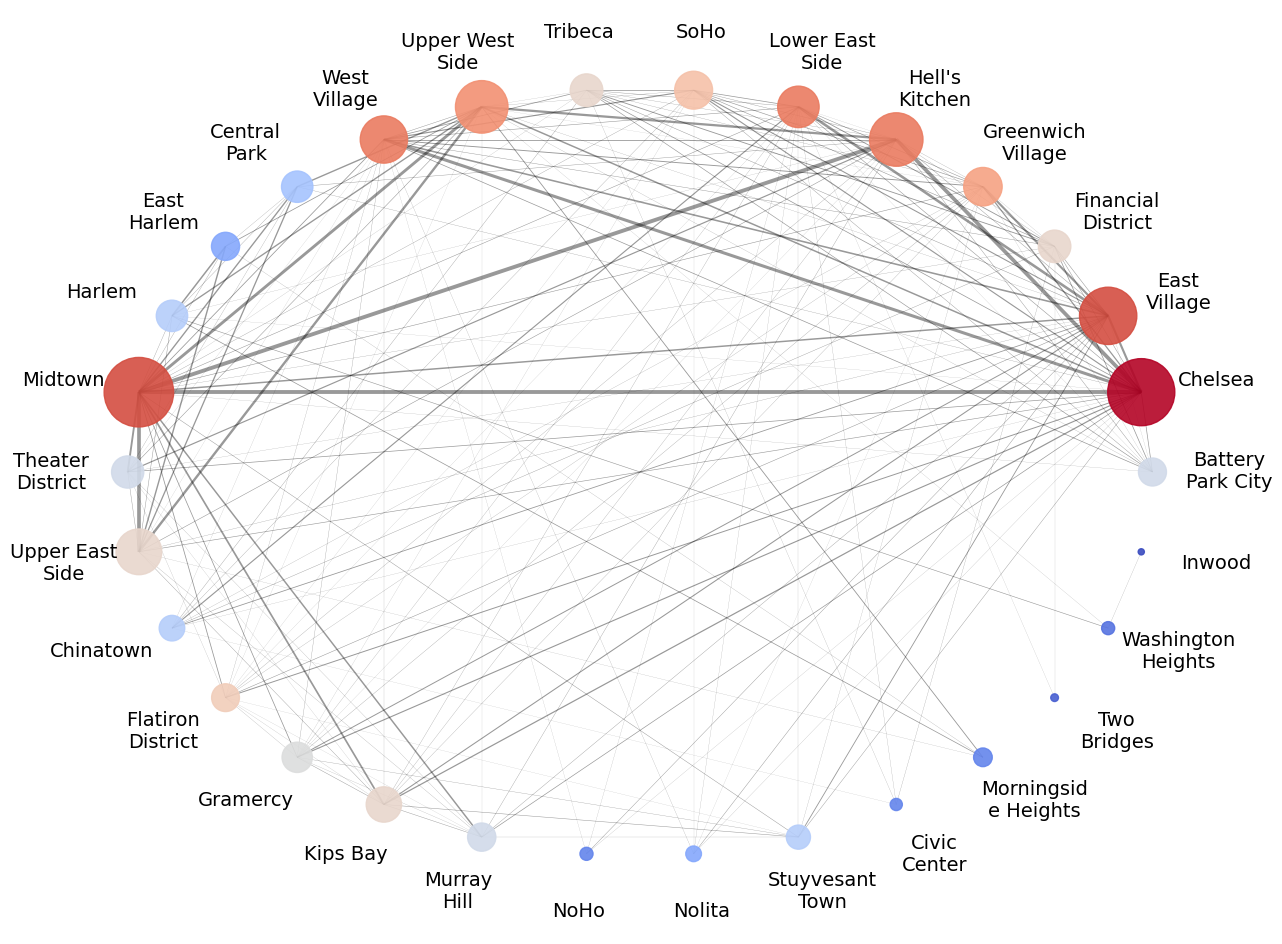

In [5]:
#plot
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos,
                       node_size=node_size,
                       node_color=node_colors,
                       cmap=cmap,
                       alpha=0.9)
top_labels = {node: wrap_label(node) for node in G.nodes()}

nx.draw_networkx_edges(
    G, pos,
    width=[w * 0.002 for w in edge_weights],
    alpha=0.4
)

# move labels outside the circle
for node, (x, y) in pos.items():
    label_x = x * 1.15
    label_y = y * 1.15
    plt.text(
        label_x, label_y,
        s=top_labels[node],
        fontsize=14,
        ha='center',
        va='center'
    )

plt.axis('off')
plt.show()
